### Case Study 3 : Textual analysis of movie reviews

** Due Date: April 6, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:**

Helen Hong
Haley Huang
Tom Meagher
Tyler Reese

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.
* [Upgrade Scikit Learn on Mac OS X](http://stackoverflow.com/questions/12219657/upgrade-version-of-scikit-learn-included-in-enthought-canopy-distribution)

#### Load the Data from Source

In [20]:
import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = 'text_analytics/txt_sentoken'


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path=DATA_FOLDER)
    os.remove(ARCHIVE_NAME)
else:
    print("Dataset already exists")

Dataset already exists


#### Global Imports

In [5]:
import numpy as np
import pandas as pa
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import scipy
from time import time

%matplotlib inline

#### Load data

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn import metrics

dataset = load_files('txt_sentoken', shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


#### Split data into training (75%) and testing (25%) sets

In [7]:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

#### Build pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Vectorizer / classifier pipeline that filters out tokens that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

#### Grid search

In [9]:
# Find out whether unigrams or bigrams are more useful.
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
# Fit pipeline on training set using grid search for the parameters
grid_search.fit(docs_train, y_train)

# Print cross-validated scores for each parameter set explored by the grid search
print(grid_search.grid_scores_)

# Predict outcome on testing set and store it in a variable named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

[mean: 0.82200, std: 0.00748, params: {'vect__ngram_range': (1, 1)}, mean: 0.83533, std: 0.00984, params: {'vect__ngram_range': (1, 2)}]
             precision    recall  f1-score   support

        neg       0.90      0.88      0.89       247
        pos       0.88      0.91      0.89       253

avg / total       0.89      0.89      0.89       500



#### Print and plot confusion matrix

[[217  30]
 [ 24 229]]


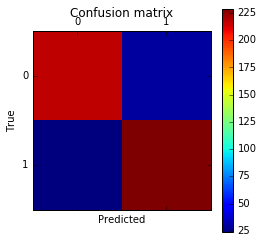

In [15]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.title('Confusion matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

#### Parameters in tf-idf Vectorizer
* **min_df**: filter all terms with frequency lower than this value
* **max-df**: filter all terms with frequecy greater than this value, used to filter out stop words.
* **n-gram range**: How many n-gram words are to be considered

#### Test tf-idf vectorizer object on training set

In [12]:
tfidfv = TfidfVectorizer()
tfidfv = tfidfv.set_params(max_df=0.75, max_features= 5000, use_idf= True, smooth_idf=True, sublinear_tf = True)

In [13]:
t0 = time()
vectors = tfidfv.fit_transform(docs_train) 
print("done in %0.3fs" % (time() - t0))

done in 2.181s


#### Explore how the min_df and max_df change the number of features we get 

C:\Users\Tyler\AppData\Local\Enthought\Canopy\User\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


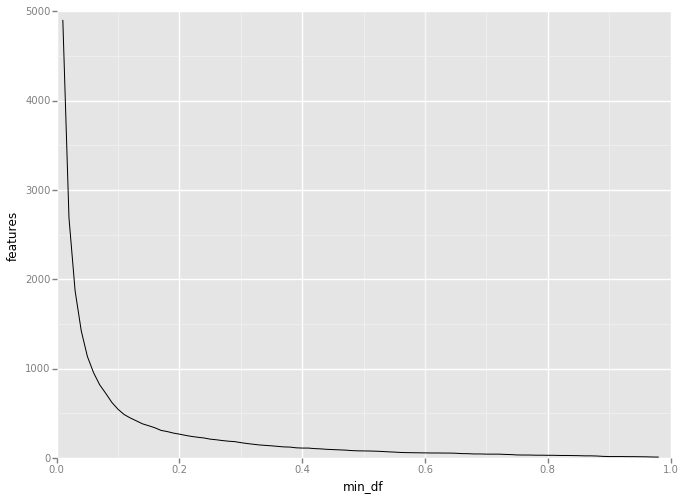

<ggplot: (24655318)>


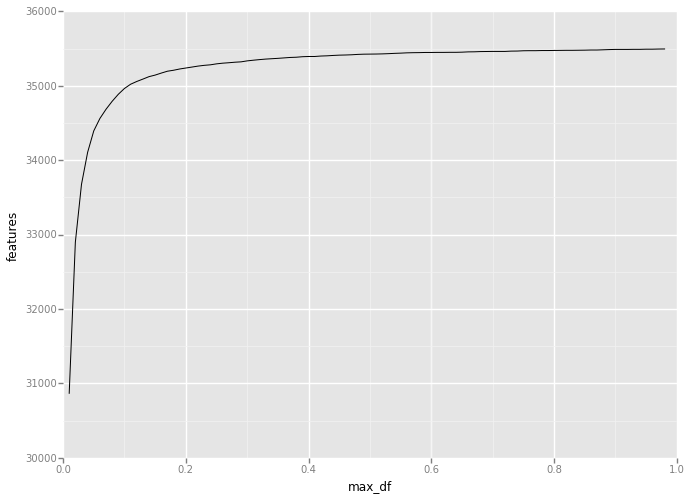

<ggplot: (23096818)>


In [15]:
import numpy as np
value_range=np.arange(0.01,0.99,0.01)
y1=[TfidfVectorizer(min_df=x).fit_transform(docs_train).shape[1] for x in value_range]
y2=[TfidfVectorizer(max_df=x).fit_transform(docs_train).shape[1] for x in value_range]
from ggplot import *
print qplot(value_range,y=y1,geom='line')+xlab('min_df')+ylab('features')
print qplot(value_range,y=y2,geom='line')+xlab('max_df')+ylab('features')

#### Explore how the ngram_range change the number of features we get 

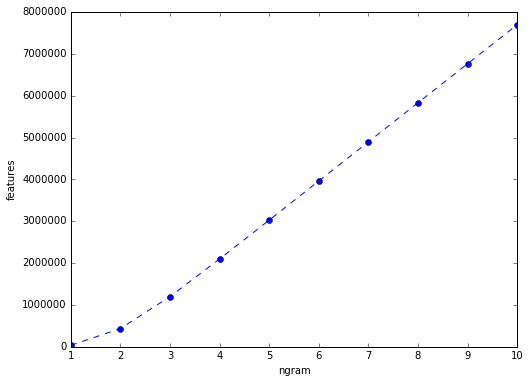

In [16]:
x=[1 for i in range(10)]
y=np.arange(10)+1
parameter=zip(x,y)
y3=[TfidfVectorizer(ngram_range=i).fit_transform(docs_train).shape[1] for i in parameter]
fig=plt.figure(figsize=(8,6))
plt.plot([1,2,3,4,5,6,7,8,9,10],y3,'b--o')
plt.xlabel('ngram')
plt.ylabel('features')

In [4]:
#setting max_df and n_gram_range as default, we choose min_df in [1,2,3,4,5] seperately, 
#and store the corresponding Xtrain and Xtest into min_df_data array.
min_df_data=[(TfidfVectorizer(min_df=i).fit_transform(docs_train).toarray(),
TfidfVectorizer(min_df=i).fit(docs_train).transform(docs_test).toarray()) for i in [1,3,5,7]]


In [5]:
#setting min_df and n_gram_range as default, we choose max_df in [0.40,0.5, 0.60, 0.7] seperately, 
#and store the corresponding Xtrain and Xtest into max_df_data array.
max_df_data=[(TfidfVectorizer(max_df=i).fit_transform(docs_train).toarray(),
TfidfVectorizer(max_df=i).fit(docs_train).transform(docs_test).toarray()) for i in [0.40,0.5, 0.60, 0.7]]

In [6]:
#setting min_df and max_df as default, we choose ngram_range in [(1,1),(1,2),(1,3)] seperately, 
#and store the corresponding Xtrain and Xtest into ngram_range_data array.
ngram_range_data=[(TfidfVectorizer(ngram_range=i).fit_transform(docs_train),
TfidfVectorizer(ngram_range=i).fit(docs_train).transform(docs_test)) for i in [(1,1),(1,2)]]

In [17]:
# explore parameters in tfidf for both linear SVC and KNN
param_grid = [
  {'C': [1]},
   ]
grid_search = GridSearchCV(LinearSVC(), param_grid, n_jobs=1, verbose=1)
min_df_fit=[grid_search.fit(i[0],y_train).predict(i[1]) for i in min_df_data ]
max_df_fit=[grid_search.fit(i[0],y_train).predict(i[1]) for i in max_df_data ]
ngram_range_fit=[grid_search.fit(i[0],y_train).predict(i[1]) for i in ngram_range_data]

min_df_svc_score=[metrics.accuracy_score(min_df_fit[i],y_test) for i in range(4)]
max_df_svc_score=[metrics.accuracy_score(max_df_fit[i],y_test) for i in range(4)]
ngram_range_svc_score=[metrics.accuracy_score(ngram_range_fit[i],y_test) for i in range(2)]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.8s finished



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   47.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.3s finished



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.2min finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.5min finished



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.3s finished


In [18]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = [
  {'n_neighbors': [1,4]},
   ]
grid_search1 = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=1, verbose=1)
min_df_fit1=[grid_search1.fit(i[0],y_train).predict(i[1]) for i in min_df_data ]
max_df_fit1=[grid_search1.fit(i[0],y_train).predict(i[1]) for i in max_df_data ]
ngram_range_fit1=[grid_search1.fit(i[0],y_train).predict(i[1]) for i in ngram_range_data]

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 13.6min finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.5min finished



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.1min finished



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.0min finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.9min finished



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 11.8min finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.3min finished



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.7s finished


In [19]:
min_df_knn_score=[metrics.accuracy_score(min_df_fit1[i],y_test) for i in range(4)]
max_df_knn_score=[metrics.accuracy_score(max_df_fit1[i],y_test) for i in range(4)]
ngram_range_knn_score=[metrics.accuracy_score(ngram_range_fit1[i],y_test) for i in range(2)]

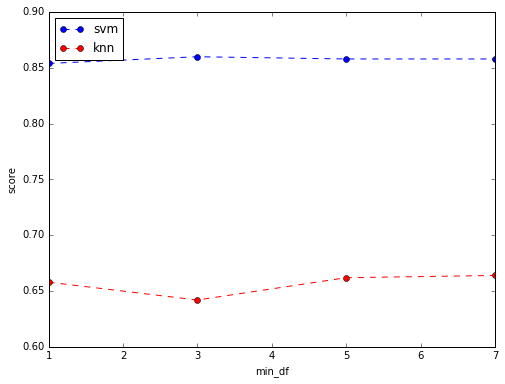

In [20]:
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(8,6))
plt.plot([1,3,5,7], min_df_svc_score, 'bo--',label='svm')
plt.plot([1,3,5,7], min_df_knn_score, 'ro--',label='knn')
plt.legend(loc='best')
plt.xlabel('min_df')
plt.ylabel('score')

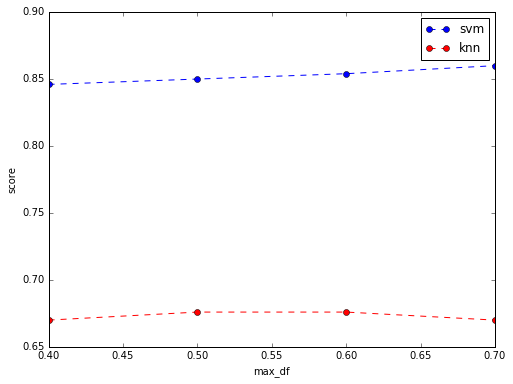

In [21]:
fig=plt.figure(figsize=(8,6))
plt.plot([0.40,0.5, 0.60, 0.7], max_df_svc_score, 'bo--',label='svm')
plt.plot([0.40,0.5, 0.60, 0.7], max_df_knn_score, 'ro--',label='knn')
plt.legend(loc='best')
plt.xlabel('max_df')
plt.ylabel('score')

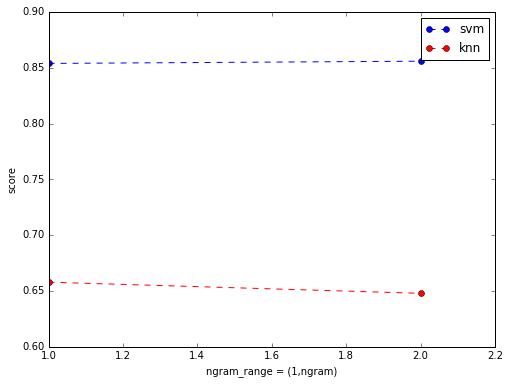

In [22]:
fig=plt.figure(figsize=(8,6))
plt.plot([1,2], ngram_range_svc_score, 'bo--',label='svm')
plt.plot([1,2], ngram_range_knn_score, 'ro--',label='knn')
plt.legend(loc='best')
plt.xlabel('ngram_range = (1,ngram)')
plt.ylabel('score')

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

#### Fit TfidVectorizer using docs_train, and compute "Xtrain" and "Xtest"

In [25]:
# This is all done in the following line of code.  Note that we never explicitly define Xtrain and Xtest.  Rather, data is of
# form data = [X train , X test].  Thus Xtrain = data[0] and Xtest = data[1]
data=[TfidfVectorizer().fit_transform(docs_train).toarray(), TfidfVectorizer().fit(docs_train).transform(docs_test).toarray()]

#### K-Nearest Neighbors

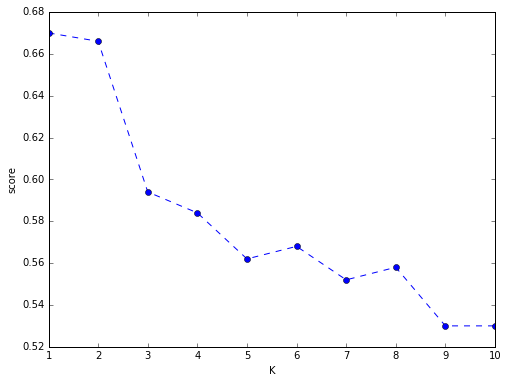

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# We use K-values ranging from 1-10
k=[1,2,3,4,5,6,7,8,9,10]

# Train a model on the trainng set and use that model to predict on the testing set
predicted_knn=[KNeighborsClassifier(n_neighbors=i).fit(data[0],y_train).predict(data[1]) for i in k]

#Compute accuracy on the testing set for each value of k
score_knn=[metrics.accuracy_score(predicted_knn[i],y_test) for i in range(10)]

# Plot accuracy on the test set vs. k
fig=plt.figure(figsize=(8,6))
plt.plot([1,2,3,4,5,6,7,8,9,10], score_knn, 'bo--',label='knn')
plt.xlabel('K')
plt.ylabel('score')


#### Linear SVC

[[127 132]
 [ 33 208]]


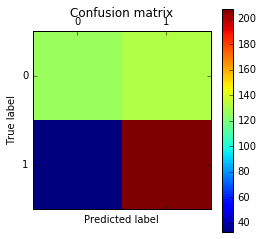

In [30]:
y_predicted = predicted_knn[0]
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

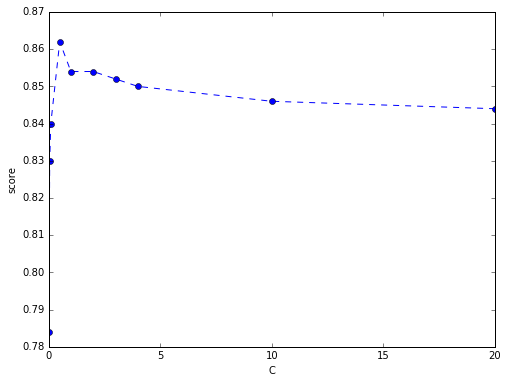

In [27]:
C=[.01,.05,.1,.5,1,2,3,4,10,20]
predicted_svm=[LinearSVC(C=i).fit(data[0],y_train).predict(data[1]) for i in C]
score_svm=[metrics.accuracy_score(predicted_svm[i],y_test) for i in range(10)]

fig=plt.figure(figsize=(8,6))
plt.plot([.01,.05,.1,.5,1,2,3,4,10,20], score_svm, 'bo--',label='svm')
plt.xlabel('C')
plt.ylabel('score')



[[212  47]
 [ 27 214]]


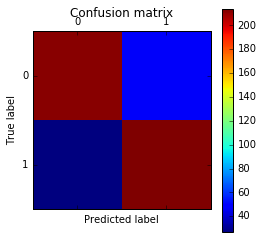

In [36]:
y_predicted = predicted_svm[9]
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Mis-classified Reviews

In [28]:
print predicted_svm[9]
print
print y_test

[0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0
 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1
 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 

In [31]:
print docs_test[1]

susan granger's review of " session 9 " ( usa films ) 
sometimes you just get more than your bargained for . . . like when boston-based hazmat elimination , run by scottish actor peter mullan and his trusty assistant , david caruso , assures a town engineer ( paul guilifoyle ) that they can remove insidious asbestos fibers from a victorian hospital facility in a week . 
erected in 1871 , deserted and decomposing since 1985 , the danvers mental hospital , is one of the most malevolent " locations " ever chosen for a film . 
the structure is so massive - with its labyrinth of rubble-strewn corridors , collapsing floors , stagnant pools of water , isolation cells , and ominous surgical chambers where experimental pre-frontal lobotomies were performed - that their task seems impossible within that time frame . 
and each member of their inexperienced crew ( stephan gevedon , brandon sexton iii , and josh lucas ) is coping with his own personal demons as , one by one , their minds seem to be

In [32]:
print docs_test[9]

this summer , one of the most racially charged novels in john grisham's series , a time to kill , was made into a major motion picture . 
on january 3 of this year , director rob reiner basically re-released the film under the title of ghosts of mississippi . 
based on the true story of 1963 civil rights leader medgar evars' assassination , ghosts of mississippi revolves around the 25-year legal battle faced by myrlie evars ( whoopi goldberg , sister act ) and her quest to have her husband's obvious assassin and racist byron de la beckwith ( james woods , casino ) jailed . 
so she turns to assistant district attorney and prosecutor bobby delaughter ( alec baldwin , heaven's prisoners ) to imprison the former kkk member . 
ghosts sets its tone with an opening montage of images from african-american history , from slave-ship miseries to life in the racist south of the 1960's . 
but all too soon , the white folks take over , intoning lines like " what's america got to do with anything ? 


*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

#### First, build a new set of predictors, based on the text-structure of each document.

In [33]:
# Total number of words with more than one letter in the review
total_words = [len([words for words in review.split() if len(words)>1]) for review in dataset.data]

# Total number of sentences
total_sentences = [len(review.split('.'))+1 for review in dataset.data]

# Average number of words per sentence
average_sentence_length = [len([words for words in review.split() if len(words)>1])/ float((len(review.split('\n')))) for review in dataset.data]

# Total number of words endint in n't in the document
number_of_not_contractions = [review.count("'t") for review in dataset.data]

# Total occurences of the word "not"
number_of_nots = [review.count("not") for review in dataset.data]

# Number of "not" and "n't" occurences
total_nots = [number_of_not_contractions[i] + number_of_nots[i] for i in range(len(number_of_not_contractions))]

number_of_contractions = [review.count("'") for review in dataset.data]


# Determine number of words in the last sentence
last_sentence = [review.split('\n')[len(review.split('\n'))-2] for review in dataset.data]
last_sentence_length = [len([words for words in sen.split( ) if len(words) > 1]) for sen in last_sentence]

# Number of words in the first sentence of each review
first_sentence = [review.split('\n')[0] for review in dataset.data]
first_sentence_length = [len([words for words in sen.split( ) if len(words) > 1]) for sen in first_sentence]

# Number of words in the longest sentence
longest_sentence = [max([len([words for words in sen.split( ) if len(words) > 1]) for sen in [sentences for sentences in review.split('\n') 
                                                                                              if len(sentences) > 3]] 
                             ) for review in dataset.data]

# Number of words in the shortest sentence
shortest_sentence = [min([len([words for words in sen.split( ) if len(words) > 1]) for sen in [sentences for sentences in review.split('\n') 
                                                                                              if len(sentences) > 3]] 
                             ) for review in dataset.data]

# Standard deviation of sentence length (in words)
sent_dev = [np.std([len([words for words in sen.split( ) if len(words) > 1]) for sen in [sentences for sentences in review.split('\n') 
                                                                                              if len(sentences) > 3]] 
                             ) for review in dataset.data]

# Total number of occurences of () or ... or ?

number_of_parenth = [review.count("(") for review in dataset.data]
number_of_elips = [review.count(". . .") for review in dataset.data]
number_of_questions = [review.count("?") for review in dataset.data]
number_of_punc = [number_of_parenth[i]+number_of_elips[i]+number_of_questions[i] for i in range(len(number_of_parenth))]

# Percent of all leters that are vowels
percent_vowels = [(review.count('a')+ review.count('e') + review.count('i') + review.count('o') + review.count('u'))/
                 float(len(review)) for review in dataset.data]

# Percent of words that start with vowels
percent_start_vowels = [(review.count(' a')+ review.count(' e') + review.count(' i') + review.count(' o') + review.count(' u'))/
                 float(len(review)) for review in dataset.data]


total_you = [review.count('you') for review in dataset.data]


# Count the number of negative-connotation prefixes which occur.
no_dis = [review.count(' dis')for review in dataset.data]
no_un = [review.count(' un')for review in dataset.data]
no_in = [review.count(' in')for review in dataset.data]
no_il = [review.count(' il')for review in dataset.data]
no_im = [review.count(' im')for review in dataset.data]
no_sub = [review.count(' sub')for review in dataset.data]
no_under = [review.count(' under')for review in dataset.data]
no_non = [review.count(' non')for review in dataset.data]

neg_prefix = [no_dis[i]+ no_un[i] + no_in[i] + no_il[i] + no_im[i] + no_sub[i] + no_under[i] + no_non[i] for i in range(len(no_dis))]

# Given a string st, this function finds the occurence of substring subst1 or subst2 which occurs closest to the beginning of st.
def first_occ(st,subst1,subst2):
    if st.find(subst1) > 0:
        if st.find(subst2) > 0:
            return min(st.find(subst1),st.find(subst2))
        else:
            return st.find(subst1)
    else:
        return st.find(subst2)

# Locate the first "not" or "n't" in the review
first_not = [first_occ(review,"not","'t")/float(len(review)) for review in dataset.data]

# Locate the last "not" or "n't" in the review
last_not = [first_occ(review[::-1],"ton","t'")/float(len(review)) for review in dataset.data]

# Determine the occurence of "not" or "n't" which is closest to the beginning or end of the review.
min_not = np.minimum(np.asarray(first_not),np.asarray(last_not))

In [34]:
# Store this new data in a data frame
import pandas as pd

newdata = {'Review Type': dataset.target,'Total Words': total_words, 
           'Total Sentences': total_sentences,'Average Sentence Length': average_sentence_length,
           'Number of not Contractions': number_of_not_contractions,'Total number of Nots': total_nots,'Last Sentence Length':last_sentence_length,
           'First Sentence Length': first_sentence_length,'Longest Sentence':longest_sentence,
           'Shortest Sentence':shortest_sentence, 'Number of Contractions': number_of_contractions, 'Number of () ... or ?': number_of_punc,
            'Sentence Deviation': sent_dev,#'Number of Questions': number_of_questions, 'Number of ...': number_of_elips, 
          'Number of Negative Prefixes': neg_prefix,#'Percent Vowels': percent_vowels, 'Percent Start Vowels': percent_start_vowels,
          'Total You': total_you, 'Closest Not': min_not}
data = pd.DataFrame(newdata, columns = ['Review Type','Total Words', 
           'Total Sentences','Average Sentence Length',
           'Number of not Contractions','Total number of Nots',
            'Last Sentence Length',
           'First Sentence Length','Longest Sentence',
           'Shortest Sentence','Number of Contractions','Number of () ... or ?','Sentence Deviation',#'Number of Questions', 'Number of ...', 
                                        'Number of Negative Prefixes',#'Percent Vowels', 'Percent Start Vowels',
                                        'Total You','Closest Not'])

data

,Review Type,Total Words,Total Sentences,Average Sentence Length,Number of not Contractions,Total number of Nots,Last Sentence Length,First Sentence Length,Longest Sentence,Shortest Sentence,Number of Contractions,Number of () ... or ?,Sentence Deviation,Number of Negative Prefixes,Total You,Closest Not
0,0,676,36,18.777778,6,9,27,12,53,1,16,19,14.163880,20,5,0.127133
1,0,227,16,16.214286,3,4,8,6,48,4,13,3,13.471425,6,3,0.093431
2,0,472,24,19.666667,5,12,6,19,47,6,15,7,9.449498,15,3,0.066362
3,0,456,22,22.800000,2,3,11,26,48,3,25,10,12.013151,9,2,0.138614
4,0,698,39,18.368421,1,12,14,23,42,3,15,10,8.801604,34,2,0.032820
5,0,641,37,17.805556,0,4,11,18,34,3,3,3,6.497346,23,0,0.035796
6,0,525,26,18.750000,3,6,11,11,40,2,17,6,10.945431,30,7,0.039525
7,0,540,25,19.285714,3,9,10,9,79,3,21,15,16.149762,30,4,0.007316
8,0,684,31,20.117647,7,12,9,8,56,3,26,14,11.531965,33,0,0.172497
9,0,739,57,14.780000,5,11,25,15,48,1,22,37,11.446124,17,11,0.090270


In [35]:
# Normalize the Data.
Udata = data.drop('Review Type', 1)
Udata_norm =(Udata - Udata.min()) / (Udata.max() - Udata.min())

data_array = Udata_norm.as_matrix(columns = None)

In [36]:
# Train a decision tree on the normalized data.
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 6)
clf = clf.fit(Udata_norm,data['Review Type'])

features = list(Udata.columns)


# Split the data into Negative and Positive subsets.
Neg = Udata_norm.ix[Udata.index[data['Review Type']==0]]
Pos = Udata_norm.ix[Udata.index[data['Review Type']==1]]

In [37]:
# The following code was obtained via GitHub.  It prints a description of a classification tree.
def print_decision_tree(tree, feature_names=None, offset_unit='    '):
    '''Plots textual representation of rules of a decision tree
    tree: scikit-learn representation of tree
    feature_names: list of feature names. They are set to f1,f2,f3,... if not specified
    offset_unit: a string of offset of the conditional block'''

    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    if feature_names is None:
        features  = ['f%d'%i for i in tree.tree_.feature]
    else:
        features  = feature_names       

    def recurse(left, right, threshold, features, node, depth=0):
            offset = offset_unit*depth
            if (threshold[node] != -2):
                    print(offset+"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                    if left[node] != -1:
                            recurse (left, right, threshold, features,left[node],depth+1)
                    print(offset+"} else {")
                    if right[node] != -1:
                            recurse (left, right, threshold, features,right[node],depth+1)
                    print(offset+"}")
            else:
                    print(offset+"return " + str(value[node]))

    recurse(left, right, threshold, features, 0,0)
print_decision_tree(clf, offset_unit = '   ')

if ( f8 <= 0.0833333358169 ) {
   if ( f2 <= 0.397718280554 ) {
      if ( f11 <= 0.349428236485 ) {
         if ( f2 <= 0.305362761021 ) {
            if ( f9 <= 0.201298698783 ) {
               if ( f6 <= 0.170588240027 ) {
                  return [[ 34.  41.]]
               } else {
                  return [[ 44.  24.]]
               }
            } else {
               if ( f0 <= 0.669308662415 ) {
                  return [[ 78.  21.]]
               } else {
                  return [[ 0.  3.]]
               }
            }
         } else {
            if ( f1 <= 0.103351950645 ) {
               if ( f13 <= 0.205128222704 ) {
                  return [[ 5.  0.]]
               } else {
                  return [[ 0.  1.]]
               }
            } else {
               if ( f4 <= 0.202702701092 ) {
                  return [[ 14.  44.]]
               } else {
                  return [[ 23.  23.]]
               }
            }
         }
      } else {
         if

#### Now, based on the printed tree, manually construct the desired scatter plots, as described in the report.

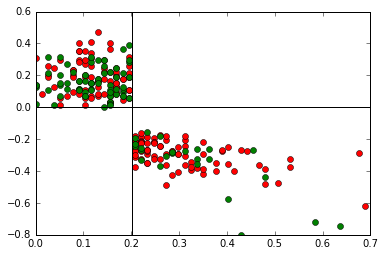

In [39]:
#one

Neg1a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] <= .34943,
                        np.logical_and(Neg['Average Sentence Length']<=.30536,
                        Neg['Number of Contractions']<= .2013))))]]
Neg1b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] <= .34943,
                        np.logical_and(Neg['Average Sentence Length']<=.30536,
                        Neg['Number of Contractions']> .2013))))]]
Pos1a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .34943,
                        np.logical_and(Pos['Average Sentence Length']<=.30536,
                        Pos['Number of Contractions']<= .2013))))]]
Pos1b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .34943,
                        np.logical_and(Pos['Average Sentence Length']<=.30536,
                        Pos['Number of Contractions'] > .2013))))]]

py.plot(Neg1a['Number of Contractions'],Neg1a['First Sentence Length'],'ro')
py.plot(Neg1b['Number of Contractions'],-Neg1b['Total Words'],'ro')
py.plot(Pos1a['Number of Contractions'],Pos1a['First Sentence Length'],'go')
py.plot(Pos1b['Number of Contractions'],-Pos1b['Total Words'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=0.2013, ymin=-0.8, ymax = 1, linewidth=1, color='k')

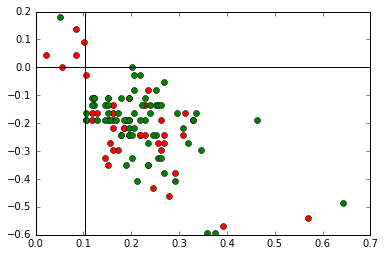

In [40]:
#Two

Neg2a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] <= .34943,
                        np.logical_and(Neg['Average Sentence Length']>.30536,
                        Neg['Total Sentences']<= .103352))))]]
Neg2b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] <= .34943,
                        np.logical_and(Neg['Average Sentence Length']>.30536,
                        Neg['Total Sentences']> .10335))))]]
Pos2a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .34943,
                        np.logical_and(Pos['Average Sentence Length']>.30536,
                        Pos['Total Sentences']<= .103352))))]]
Pos2b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .34943,
                        np.logical_and(Pos['Average Sentence Length']>.30536,
                        Pos['Total Sentences'] > .10335))))]]

py.plot(Neg2a['Total Sentences'],Neg2a['Number of not Contractions'],'ro')
py.plot(Neg2b['Total Sentences'],-Neg2b['Total number of Nots'],'ro')
py.plot(Pos2a['Total Sentences'],Pos2a['Number of not Contractions'],'go')
py.plot(Pos2b['Total Sentences'],-Pos2b['Total number of Nots'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.10335, ymin=-1, ymax = 1, linewidth=1, color='k')

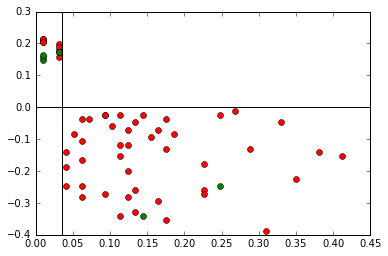

In [41]:
#Three

Neg3a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] > .34943,
                        np.logical_and(Neg['Longest Sentence']<=.216535,
                        Neg['Last Sentence Length']<= .03608))))]]
Neg3b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] > .34943,
                        np.logical_and(Neg['Longest Sentence']<=.216535,
                        Neg['Last Sentence Length']> .03608))))]]
Pos3a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .34943,
                        np.logical_and(Pos['Longest Sentence']<=.216535,
                        Pos['Last Sentence Length']<= .03608))))]]
Pos3b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .34943,
                        np.logical_and(Pos['Longest Sentence']<=.216535,
                        Pos['Last Sentence Length']> .03608))))]]

py.plot(Neg3a['Last Sentence Length'],Neg3a['Longest Sentence'],'ro')
py.plot(Neg3b['Last Sentence Length'],-Neg3b['First Sentence Length'],'ro')
py.plot(Pos3a['Last Sentence Length'],Pos3a['Longest Sentence'],'go')
py.plot(Pos3b['Last Sentence Length'],-Pos3b['First Sentence Length'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.03608, ymin=-1, ymax = 1, linewidth=1, color='k')

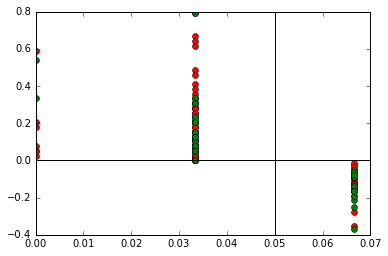

In [42]:
#four

Neg4a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] > .34943,
                        np.logical_and(Neg['Longest Sentence']>.216535,
                        Neg['Shortest Sentence']<= .05))))]]
Neg4b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] <= .39771, 
                        np.logical_and(Neg['Sentence Deviation'] > .34943,
                        np.logical_and(Neg['Longest Sentence']>.216535,
                        Neg['Shortest Sentence']> .05))))]]
Pos4a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .34943,
                        np.logical_and(Pos['Longest Sentence']>.216535,
                        Pos['Shortest Sentence']<= .05))))]]
Pos4b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] <= .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .34943,
                        np.logical_and(Pos['Longest Sentence']>.216535,
                        Pos['Shortest Sentence']> .05))))]]

py.plot(Neg4a['Shortest Sentence'],Neg4a['Total You'],'ro')
py.plot(Neg4b['Shortest Sentence'],-Neg4b['Number of () ... or ?'],'ro')
py.plot(Pos4a['Shortest Sentence'],Pos4a['Total You'],'go')
py.plot(Pos4b['Shortest Sentence'],-Pos4b['Number of () ... or ?'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.05, ymin=-1, ymax = 1, linewidth=1, color='k')

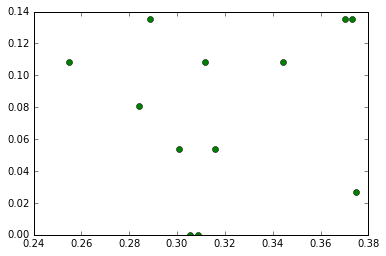

In [43]:
#five

Neg5a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation'] <= .3786,
                        np.logical_and(Neg['Total number of Nots']<= .14865,
                        Neg['Total number of Nots']<= .14865))))]]
Neg5b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation']<= .3786,
                        np.logical_and(Neg['Total number of Nots']<= .14865,
                        Neg['Total number of Nots']<= .14865))))]]
Pos5a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .3786,
                        np.logical_and(Pos['Total number of Nots']<= .14865,
                        Pos['Total number of Nots']<= .14865))))]]
Pos5b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .3786,
                        np.logical_and(Pos['Total number of Nots']<= .14865,
                        Pos['Total number of Nots']<= .14865))))]]

py.plot(Neg5a['Sentence Deviation'],Neg5a['Total number of Nots'],'ro')
#py.plot(Neg5b['Sentence Deviation'],-Neg5b['Total number of Nots'],'ro')
py.plot(Pos5a['Sentence Deviation'],Pos5a['Total number of Nots'],'go')
#py.plot(Pos3b['Shortest Sentence'],-Pos3b['Number of () ... or ?'],'go')
#plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
#plt.axvline(x=.05, ymin=-1, ymax = 1, linewidth=1, color='k')

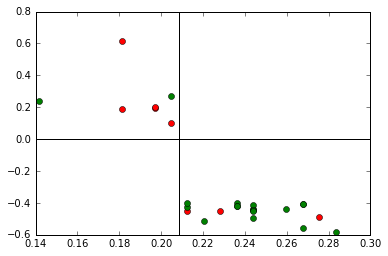

In [44]:
#Six

Neg6a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation'] <= .3786,
                        np.logical_and(Neg['Total number of Nots']> .14865,
                        Neg['Longest Sentence']<= .20866))))]]
Neg6b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation']<= .3786,
                        np.logical_and(Neg['Total number of Nots']> .14865,
                        Neg['Longest Sentence']> .20866))))]]
Pos6a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .3786,
                        np.logical_and(Pos['Total number of Nots']> .14865,
                        Pos['Longest Sentence']<= .20866))))]]
Pos6b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] <= .3786,
                        np.logical_and(Pos['Total number of Nots']> .14865,
                        Pos['Longest Sentence']> .20866))))]]

py.plot(Neg6a['Longest Sentence'],Neg6a['Number of Negative Prefixes'],'ro')
py.plot(Neg6b['Longest Sentence'],-Neg6b['Average Sentence Length'],'ro')
py.plot(Pos6a['Longest Sentence'],Pos6a['Number of Negative Prefixes'],'go')
py.plot(Pos6b['Longest Sentence'],-Pos6b['Average Sentence Length'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.20866, ymin=-1, ymax = 1, linewidth=1, color='k')

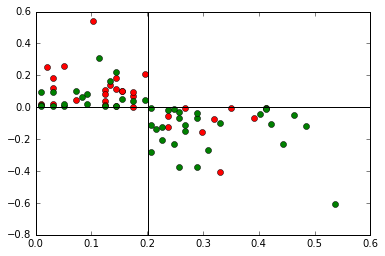

In [45]:
#Seven

Neg7a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation'] > .3786,
                        np.logical_and(Neg['First Sentence Length']<= .18235,
                        Neg['Last Sentence Length']<= .201))))]]
Neg7b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation']> .3786,
                        np.logical_and(Neg['First Sentence Length']<= .18235,
                        Neg['Last Sentence Length']> .201))))]]
Pos7a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .3786,
                        np.logical_and(Pos['First Sentence Length']<= .18235,
                        Pos['Last Sentence Length']<= .201))))]]
Pos7b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .3786,
                        np.logical_and(Pos['First Sentence Length']<= .18235,
                        Pos['Last Sentence Length']> .201))))]]

py.plot(Neg7a['Last Sentence Length'],Neg7a['Closest Not'],'ro')
py.plot(Neg7b['Last Sentence Length'],-Neg7b['Closest Not'],'ro')
py.plot(Pos7a['Last Sentence Length'],Pos7a['Closest Not'],'go')
py.plot(Pos7b['Last Sentence Length'],-Pos7b['Closest Not'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.201, ymin=-1, ymax = 1, linewidth=1, color='k')

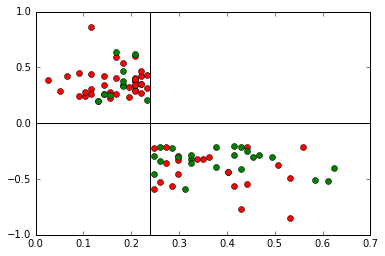

In [46]:
#Eight

Neg8a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation'] > .3786,
                        np.logical_and(Neg['First Sentence Length']> .18235,
                        Neg['Number of Contractions']<= .24026))))]]
Neg8b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']<= .08333, 
                        np.logical_and(Neg['Average Sentence Length'] > .39771, 
                        np.logical_and(Neg['Sentence Deviation']> .3786,
                        np.logical_and(Neg['First Sentence Length']> .18235,
                        Neg['Number of Contractions']> .24026))))]]
Pos8a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .3786,
                        np.logical_and(Pos['First Sentence Length']> .18235,
                        Pos['Number of Contractions']<= .24026))))]]
Pos8b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']<= .08333, 
                        np.logical_and(Pos['Average Sentence Length'] > .39771, 
                        np.logical_and(Pos['Sentence Deviation'] > .3786,
                        np.logical_and(Pos['First Sentence Length']> .18235,
                        Pos['Number of Contractions']> .24026))))]]

py.plot(Neg8a['Number of Contractions'],Neg8a['Longest Sentence'],'ro')
py.plot(Neg8b['Number of Contractions'],-Neg8b['First Sentence Length'],'ro')
py.plot(Pos8a['Number of Contractions'],Pos8a['Longest Sentence'],'go')
py.plot(Pos8b['Number of Contractions'],-Pos8b['First Sentence Length'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.24026, ymin=-1, ymax = 1, linewidth=1, color='k')

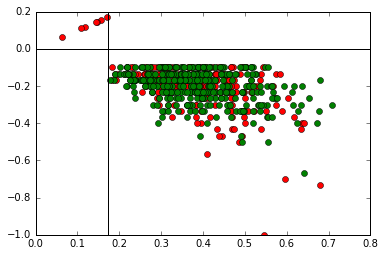

In [47]:
#Nine

Neg9a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] <= .113636,
                        np.logical_and(Neg['Sentence Deviation']<= .47657,
                        Neg['Average Sentence Length']<= .17407))))]]
Neg9b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] <= .113636,
                        np.logical_and(Neg['Sentence Deviation']<= .47657,
                        Neg['Average Sentence Length']> .17407))))]]
Pos9a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] <= .113636,
                        np.logical_and(Pos['Sentence Deviation']<= .47657,
                        Pos['Average Sentence Length']<= .17407))))]]
Pos9b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] <= .113636,
                        np.logical_and(Pos['Sentence Deviation']<= .47657,
                        Pos['Average Sentence Length']> .17407))))]]

py.plot(Neg9a['Average Sentence Length'],Neg9a['Average Sentence Length'],'ro')
py.plot(Neg9b['Average Sentence Length'],-Neg9b['Shortest Sentence'],'ro')
py.plot(Pos9a['Average Sentence Length'],Pos9a['Average Sentence Length'],'go')
py.plot(Pos9b['Average Sentence Length'],-Pos9b['Shortest Sentence'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.17407, ymin=-1, ymax = 1, linewidth=1, color='k')

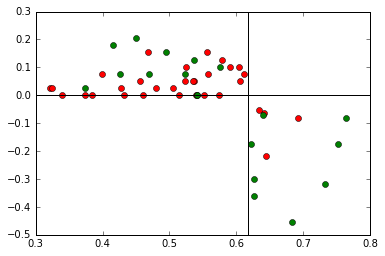

In [48]:
#ten

Neg10a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] <= .113636,
                        np.logical_and(Neg['Sentence Deviation']> .47657,
                        Neg['Average Sentence Length']<= .6169))))]]
Neg10b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] <= .113636,
                        np.logical_and(Neg['Sentence Deviation']> .47657,
                        Neg['Average Sentence Length']> .6169))))]]
Pos10a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] <= .113636,
                        np.logical_and(Pos['Sentence Deviation']> .47657,
                        Pos['Average Sentence Length']<= .6169))))]]
Pos10b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] <= .113636,
                        np.logical_and(Pos['Sentence Deviation']> .47657,
                        Pos['Average Sentence Length']> .6169))))]]

py.plot(Neg10a['Average Sentence Length'],Neg10a['Total You'],'ro')
py.plot(Neg10b['Average Sentence Length'],-Neg10b['Last Sentence Length'],'ro')
py.plot(Pos10a['Average Sentence Length'],Pos10a['Total You'],'go')
py.plot(Pos10b['Average Sentence Length'],-Pos10b['Last Sentence Length'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.6169, ymin=-1, ymax = 1, linewidth=1, color='k')

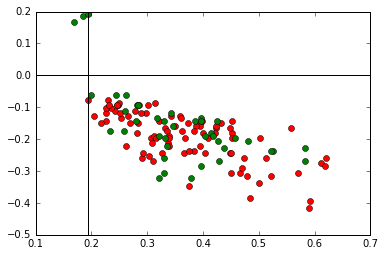

In [49]:
#eleven

Neg11a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] > .113636,
                        np.logical_and(Neg['Total Words']<= .21692,
                        Neg['Average Sentence Length']<= .19357))))]]
Neg11b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] > .113636,
                        np.logical_and(Neg['Total Words']<= .21692,
                        Neg['Average Sentence Length']> .19357))))]]
Pos11a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] > .113636,
                        np.logical_and(Pos['Total Words']<= .21692,
                        Pos['Average Sentence Length']<= .19357))))]]
Pos11b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] > .113636,
                        np.logical_and(Pos['Total Words']<= .21692,
                        Pos['Average Sentence Length']> .19357))))]]

py.plot(Neg11a['Average Sentence Length'],Neg11a['Average Sentence Length'],'ro')
py.plot(Neg11b['Average Sentence Length'],-Neg11b['Longest Sentence'],'ro')
py.plot(Pos11a['Average Sentence Length'],Pos11a['Average Sentence Length'],'go')
py.plot(Pos11b['Average Sentence Length'],-Pos11b['Longest Sentence'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.19357, ymin=-1, ymax = 1, linewidth=1, color='k')

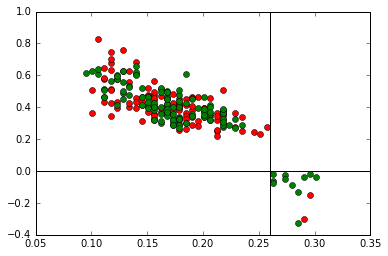

In [50]:
#twelve

Neg12a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] > .113636,
                        np.logical_and(Neg['Total Words']> .21692,
                        Neg['Total Sentences']<= .25978))))]]
Neg12b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] <= .3439, 
                        np.logical_and(Neg['Number of not Contractions'] > .113636,
                        np.logical_and(Neg['Total Words']> .21692,
                        Neg['Total Sentences']> .25978))))]]
Pos12a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] > .113636,
                        np.logical_and(Pos['Total Words']> .21692,
                        Pos['Total Sentences']<= .25978))))]]
Pos12b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] <= .3439, 
                        np.logical_and(Pos['Number of not Contractions'] > .113636,
                        np.logical_and(Pos['Total Words']> .21692,
                        Pos['Total Sentences']> .25978))))]]

py.plot(Neg12a['Total Sentences'],Neg12a['Average Sentence Length'],'ro')
py.plot(Neg12b['Total Sentences'],-Neg12b['Closest Not'],'ro')
py.plot(Pos12a['Total Sentences'],Pos12a['Average Sentence Length'],'go')
py.plot(Pos12b['Total Sentences'],-Pos12b['Closest Not'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.25978, ymin=-1, ymax = 1, linewidth=1, color='k')

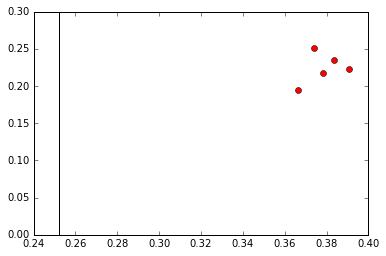

In [51]:
#thirteen

Neg13a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] > .3439, 
                        np.logical_and(Neg['Average Sentence Length'] <= .2522,
                        np.logical_and(Neg['Average Sentence Length'] <= .2522,
                        Neg['Average Sentence Length'] <= .2522))))]]
Neg13b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] > .3439, 
                        np.logical_and(Neg['Average Sentence Length'] <= .2522,
                        np.logical_and(Neg['Average Sentence Length'] <= .2522,
                        Neg['Average Sentence Length'] <= .2522))))]]
Pos13a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] > .3439, 
                        np.logical_and(Pos['Average Sentence Length'] <= .2522,
                        np.logical_and(Pos['Average Sentence Length'] <= .2522,
                        Pos['Average Sentence Length'] <= .2522))))]]
Pos13b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] > .3439, 
                        np.logical_and(Pos['Average Sentence Length'] <= .2522,
                        np.logical_and(Pos['Average Sentence Length'] <= .2522,
                        Pos['Average Sentence Length'] <= .2522))))]]

py.plot(Neg13a['Total Words'],Neg13a['Average Sentence Length'],'ro')
#py.plot(Neg12b['Total Sentences'],-Neg12b['Closest Not'],'ro')
py.plot(Pos13a['Total Words'],Pos13a['Average Sentence Length'],'go')
#py.plot(Pos12b['Total Sentences'],-Pos12b['Closest Not'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.2522, ymin=-1, ymax = 1, linewidth=1, color='k')

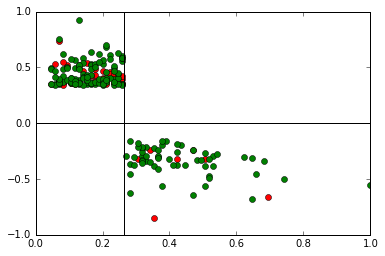

In [52]:
#fifteen

Neg15a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] > .3439, 
                        np.logical_and(Neg['Average Sentence Length'] > .2522,
                        np.logical_and(Neg['Last Sentence Length'] <= .7165,
                        Neg['First Sentence Length'] <= .2647))))]]
Neg15b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] > .3439, 
                        np.logical_and(Neg['Average Sentence Length'] > .2522,
                        np.logical_and(Neg['Last Sentence Length'] <= .7165,
                        Neg['First Sentence Length'] > .2647))))]]
Pos15a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] > .3439, 
                        np.logical_and(Pos['Average Sentence Length'] > .2522,
                        np.logical_and(Pos['Last Sentence Length'] <= .7165,
                        Pos['First Sentence Length'] <= .2647))))]]
Pos15b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] > .3439, 
                        np.logical_and(Pos['Average Sentence Length'] > .2522,
                        np.logical_and(Pos['Last Sentence Length'] <= .7165,
                        Pos['First Sentence Length'] > .2647))))]]

py.plot(Neg15a['First Sentence Length'],Neg15a['Total Words'],'ro')
py.plot(Neg15b['First Sentence Length'],-Neg15b['Longest Sentence'],'ro')
py.plot(Pos15a['First Sentence Length'],Pos15a['Total Words'],'go')
py.plot(Pos15b['First Sentence Length'],-Pos15b['Longest Sentence'],'go')

plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.2647, ymin=-1, ymax = 1, linewidth=1, color='k')

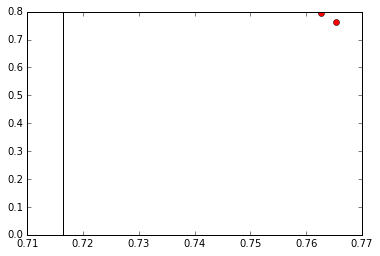

In [53]:
#sixteen

Neg16a = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] > .3439, 
                        np.logical_and(Neg['Average Sentence Length'] > .2522,
                        np.logical_and(Neg['Last Sentence Length'] > .7165,
                        Neg['Last Sentence Length'] > .7165))))]]
Neg16b = Neg.ix[Neg.index[np.logical_and(Neg['Shortest Sentence']> .08333, 
                        np.logical_and(Neg['Total Words'] > .3439, 
                        np.logical_and(Neg['Average Sentence Length'] > .2522,
                        np.logical_and(Neg['Last Sentence Length'] > .7165,
                        Neg['Last Sentence Length'] > .7165))))]]
Pos16a = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] > .3439, 
                        np.logical_and(Pos['Average Sentence Length'] > .2522,
                        np.logical_and(Pos['Last Sentence Length'] > .7165,
                        Pos['Last Sentence Length'] > .7165))))]]
Pos16b = Pos.ix[Pos.index[np.logical_and(Pos['Shortest Sentence']> .08333, 
                        np.logical_and(Pos['Total Words'] > .3439, 
                        np.logical_and(Pos['Average Sentence Length'] > .2522,
                        np.logical_and(Pos['Last Sentence Length'] > .7165,
                        Pos['Last Sentence Length'] > .7165))))]]

py.plot(Neg16a['Average Sentence Length'],Neg16a['Last Sentence Length'],'ro')
#py.plot(Neg16b['First Sentence Length'],-Neg16b['Longest Sentence'],'ro')
py.plot(Pos16a['Average Sentence Length'],Pos16a['Last Sentence Length'],'go')
#py.plot(Pos16b['First Sentence Length'],-Pos16b['Longest Sentence'],'go')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color = 'k')
plt.axvline(x=.7165, ymin=-1, ymax = 1, linewidth=1, color='k')

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 3".